# Preparations required to load extension locally, not from pip

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
# %autoreload 1 - Reload all modules imported with %aimport every time before executing the Python code typed.
# %autoreload 2 - Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
# %aimport - List modules which are to be automatically imported or not to be imported.
# %aimport foo - Import module ‘foo’ and mark it to be autoreloaded for %autoreload 1
# %aimport -foo- - Mark module ‘foo’ to not be autoreloaded.

## Autoreload caveats

Reloading Python modules in a reliable way is in general difficult, and unexpected things may occur. %autoreload tries to work around common pitfalls by replacing function code objects and parts of classes previously in the module with new versions. This makes the following things to work:

- Functions and classes imported via ‘from xxx import foo’ are upgraded to new versions when ‘xxx’ is reloaded.
- Methods and properties of classes are upgraded on reload, so that calling ‘c.foo()’ on an object ‘c’ created before the reload causes the new code for ‘foo’ to be executed.

Some of the known remaining caveats are:

- Replacing code objects does not always succeed: changing a @property in a class to an ordinary method or a method to a member variable can cause problems (but in old objects only).
- Functions that are removed (eg. via monkey-patching) from a module before it is reloaded are not upgraded.
- C extension modules cannot be reloaded, and so cannot be autoreloaded.

In [4]:
# NOTE: just in case if need to know cwd
import os
from pathlib import Path
Path(os.curdir).absolute()

PosixPath('/home/k/Works/vdf/examples/jl-simple')

In [5]:
# TODO: something is missing - this should work out of the box, no sys.path manipulations required
import sys
from pathlib import Path
ext_path = str(Path('../..').absolute().resolve())
if ext_path not in sys.path:
    sys.path.append(ext_path)

# Simple example with VHDL code

In [6]:
# Load VDF extension
%load_ext vdf

/home/k/Works/vdf/src/builder/build_coco.py:3: UserWarning: Python runners and associated APIs are an experimental feature and subject to change.
  from cocotb.runner import get_runner


In [7]:
# Reset to initial state
# (rerun from this cell if messed up to save some time)
%vdf #reset

In [8]:
# Load wavedrom script
%vdf #wavedrom

> command is obsolete!

## Let's enter source code

slowly, part by part

A header part that would be added before entity

In [9]:
%%vdf #header
library ieee;
use ieee.std_logic_1164.all;
use ieee.numeric_std.all;

Let's define clock

In [10]:
%%vdf #code
signal clk : std_logic := '0';
---
clk <= not clk after 5 ns;

Let's define some data signals

In [11]:
%%vdf #code-declaration
signal v1 : unsigned(7 downto 0) := x"05";
signal v2 : unsigned(7 downto 0) := x"07";

Lets define a function

In [12]:
%%vdf #code-declaration
function sum(a,b,c,d,e,f:unsigned(7 downto 0):=(others => '0')) return unsigned is
begin
    return a+b+c+d+e+f;
end function;

Now let's define one more signal

It's value would be defined by result of sum function, running every clk period

> (it's accumulator by the way)

In [13]:
%%vdf #code
signal s : unsigned(7 downto 0) := x"00";
---
s <= sum(s,v1,v2) when rising_edge(clk);

## Now let's check what we got

In [14]:
%vdf #show

## Let's RUN it!

(a GHDL simulator should be on jupyter host machine for this)

In [15]:
%vdf #run

INFO: Running command ghdl -i --work=top /tmp/tmpztm3zo5l/main.vhd in directory /tmp/tmpztm3zo5l/.build
INFO: Running command ghdl -i --work=top in directory /tmp/tmpztm3zo5l/.build
INFO: Running command ghdl -m --work=top main in directory /tmp/tmpztm3zo5l/.build
analyze /tmp/tmpztm3zo5l/main.vhd
elaborate main
INFO: Running command ghdl -r --work=top main --vpi=/home/k/Works/vdf/.venv/lib/python3.11/site-packages/cocotb/libs/libcocotbvpi_ghdl.so --vcd=waves.vcd in directory /tmp/tmpztm3zo5l/.build
     -.--ns INFO     gpi                                ..mbed/gpi_embed.cpp:105  in set_program_name_in_venv        Using Python virtual environment interpreter at /home/k/Works/vdf/.venv/bin/python
     -.--ns INFO     gpi                                ../gpi/GpiCommon.cpp:101  in gpi_print_registered_impl       VPI registered


loading VPI module '/home/k/Works/vdf/.venv/lib/python3.11/site-packages/cocotb/libs/libcocotbvpi_ghdl.so'
VPI module loaded!


     0.00ns INFO     cocotb                             Running on GHDL version 4.1.0 (tarball) [Dunoon edition]
     0.00ns INFO     cocotb                             Running tests with cocotb v1.8.1 from /home/k/Works/vdf/.venv/lib/python3.11/site-packages/cocotb
     0.00ns INFO     cocotb                             Seeding Python random module with 1716836983
     0.00ns INFO     cocotb.regression                  Found test src.runner.run_coco_main_module.run
     0.00ns INFO     cocotb.regression                  running run (1/1)
                                                          Run simulation and specified tasks
                                                          Save tasks results
Starting task sample_s
   200.00ns INFO     cocotb.regression                  run passed
   200.00ns INFO     cocotb.regression                  *********************************************************************************************
                                             

## Now look at diagrams - they are beautiful!

You can specify waves you want to show or just show all available

In [16]:
%%vdf #show-waves
# description is in YAML form
general:                # just a name for a tab
  __prefix__ : main/    # common prefix for enlisted signals
  clk:                  # signal name with empty value (note `:` in the end)
  s: X                  # signal name with display specification
# see https://github.com/nanamake/vcd2json?tab=readme-ov-file#module-detail)
# for display sepcifications

# if no signals specfied - then show all available (use with caution)
all of them:

vcd_file  = '/tmp/tmpztm3zo5l/.build/waves.vcd'
json_file = '/tmp/tmpztm3zo5l/.build/waves.vcd.general.json'
path_list = ['main/clk',
             'main/s']
wave_chunk = 20
start_time = 0
end_time   = 0

Create WaveJSON file "/tmp/tmpztm3zo5l/.build/waves.vcd.general.json".
vcd_file  = '/tmp/tmpztm3zo5l/.build/waves.vcd'
json_file = '/tmp/tmpztm3zo5l/.build/waves.vcd.all of them.json'
path_list = ['main/clk',
             'main/v1[7:0]',
             'main/v2[7:0]',
             'main/s[7:0]']
wave_chunk = 20
start_time = 0
end_time   = 0

Create WaveJSON file "/tmp/tmpztm3zo5l/.build/waves.vcd.all of them.json".


### Waves-general


### Waves-all of them


## Also you can draw wavesforms 'by hand'

from description in [wavedrom](https://wavedrom.com/) format

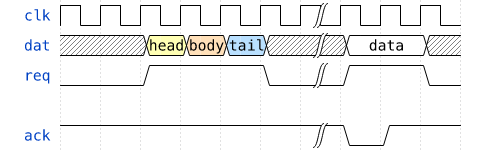

In [17]:
%%vdf #wave
{
"signal": [
  {"name": "clk", "wave": "p.....|..."},
  {"name": "dat", "wave": "x.345x|=.x", "data": ["head", "body", "tail", "data"]},
  {"name": "req", "wave": "0.1..0|1.0"},
  {},
  {"name": "ack", "wave": "1.....|01."}
]}

Entry in YAML form is supported as well

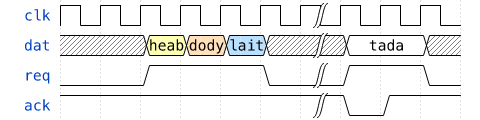

In [18]:
%%vdf #wave #format-yaml
signal:
  - name: clk
    wave: p.....|...
  - name: dat
    wave: x.345x|=.x
    data: ['heab', 'dody', 'lait', 'tada']
  - name: req
    wave: 0.1..0|1.0
  - name: ack
    wave: 1.....|01.